# **Project: Animated Scatter Plot**
+ Show the life expectancy over the fertility rate for a set of countries

### Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

### Reading Files

In [3]:
fert = pd.read_csv('data/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('data/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel ('data/gapminder_population.xlsx', index_col=0)

### Check Size of the imported files

In [3]:
fert.shape, life.shape, pop.shape

((260, 216), (260, 217), (275, 81))

### Check column type and change fertility Type to 'int'

In [4]:
fert.columns, life.columns, pop.columns

(Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
        '1809',
        ...
        '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
        '2015'],
       dtype='object', length=216),
 Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
             ...
             2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
            dtype='int64', length=217),
 Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
             1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
             1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
             1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
             1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
             1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
             2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
  

In [5]:
fert.columns = fert.columns.astype(int)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

### Change index name to 'country' and check if changes are applied

In [6]:
fert.index.name= 'country'
life.index.name= 'country'
pop.index.name= 'country'

fert.index, life.index, pop.index

(Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
        'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda',
        ...
        'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
        'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
        'Åland', 'Åland'],
       dtype='object', name='country', length=260),
 Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
        'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda',
        ...
        'Vietnam', 'Virgin Islands (U.S.)', 'North Yemen (former)',
        'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe',
        'Åland', 'South Sudan'],
       dtype='object', name='country', length=260),
 Index(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
        'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
        'Antigua and Barbuda',
      

### Move index to a column to convert tables into long format

In [7]:
fert = fert.reset_index()
life = life.reset_index()
pop = pop.reset_index()

### Convert into long format

In [8]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [9]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [10]:
pop = pop.melt(id_vars='country', var_name='year', value_name='population')

### Merge the three tables into one and show

In [11]:
df = fert.merge(pop)

In [12]:
df_1 = df.merge(life)

In [13]:
df_1

,country,year,fertility_rate,population,life_expectancy
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82
...,...,...,...,...,...
20974,Yugoslavia,2015,NaN,NaN,NaN
20975,Zambia,2015,5.59,16211767.0,56.70
20976,Zimbabwe,2015,3.35,15602751.0,59.30
20977,Åland,2015,NaN,NaN,NaN


### Take a subset of the data by choosing three countries. Create a line plot for the life expectancy over the years

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

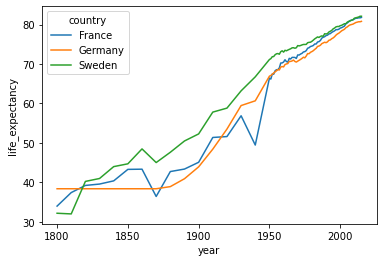

In [14]:
df_subset = df_1.loc[df['country'].isin(['France', 'Germany', 'Sweden'])]
sns.lineplot(x='year', y='life_expectancy', hue='country',
            data=df_subset)

### Create a Scatterplot of the life expectancy over the years

<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

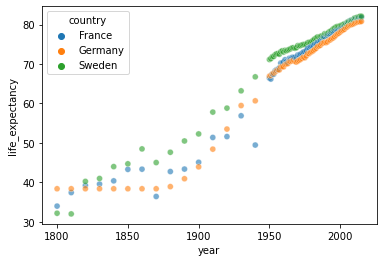

In [15]:
sns.scatterplot(x='year', y='life_expectancy', hue='country',
            data=df_subset, alpha=0.6)

### Create a Scatterplot of the life expectancy over the fertility rate 

<AxesSubplot:xlabel='life_expectancy', ylabel='fertility_rate'>

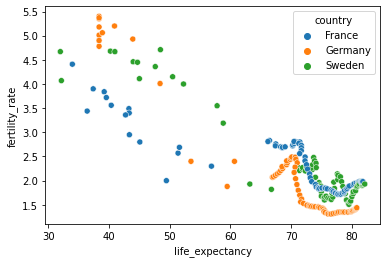

In [16]:
sns.scatterplot(x='life_expectancy', y='fertility_rate', hue='country',
            data=df_subset)

## Create Scatterplots for the years 1960 to 2015

In [36]:
iteration= range(1960,2016)
for i in iteration:
    df_year = df_subset['year'] == i
    df_filtered = df_subset[df_year]
    # set axis for all plots
    plt.axis((65.0, 85.0, 0.0, 3.0))
    plt.title("Life Expectancy over Fertility Rate (1960-2015)", fontsize=13)
    plt.xlabel('Life Expectancy')
    plt.ylabel('Fertility Rate')
   # plt.figure(figsize=(100,40))
    sns.set_style("whitegrid")
    g=sns.scatterplot(x='life_expectancy', y='fertility_rate',alpha= 0.6, hue='country',data=df_filtered, size = 'population', sizes=(50,800), palette= 'tab10')
    h,l = g.get_legend_handles_labels()
    plt.legend(h[1:4],l[1:4],title="Countries", loc="lower right", borderaxespad=0.5,frameon=True,fontsize=8,title_fontsize=12)
    #safe images in a seperate folder
    nametag = 'Scatter_Plots_Animation/Scatter_{}'.format(i)
    plt.savefig(fname = nametag, format = 'png', dpi= 100)
    plt.close()
    

### Create an animation by combining the seperate Scatterplots

In [37]:
images = []

for i in iteration:
    filename = 'Scatter_Plots_Animation/Scatter_{}'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('Scatter_Plots_Animation/Animated_Scatter.gif', images, fps=20)

### Second Subset: Extra Task

In [20]:
df_subset2 = df_1.loc[df['country'].isin(['Russia', 'China', 'Germany', 'India', 'Brazil'])]
df_subset2

,country,year,fertility_rate,population,life_expectancy
29,Brazil,1800,6.26,3.639636e+06,32.00
44,China,1800,5.50,3.216750e+08,32.00
82,Germany,1800,5.40,2.288692e+07,38.37
101,India,1800,5.95,1.685749e+08,25.44
184,Russia,1800,7.00,3.108840e+07,29.57
...,...,...,...,...,...
20749,Brazil,2015,1.78,2.078475e+08,74.40
20764,China,2015,1.57,1.376049e+09,76.20
20802,Germany,2015,1.44,8.068854e+07,80.80
20821,India,2015,2.43,1.311051e+09,67.20


### How did the fertility rate evolve with the time in a subset of highly populated countries?

(1940.0, 2000.0, 0.0, 8.0)

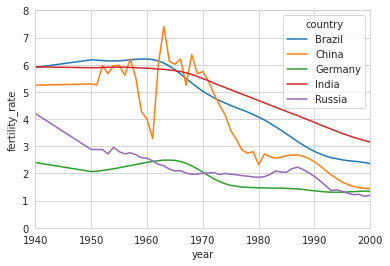

In [21]:
sns.lineplot(x='year', y='fertility_rate', hue='country',
            data=df_subset2)
plt.axis((1940, 2000, 0.0, 8.0))

### Create Scatterplots for the years bewtween 1800 and 2015

In [22]:
iteration= range(1800,2016)
for i in iteration:
    if i in df_subset2['year'].unique():
        df_year = df_subset2['year'] == i
        df_filtered = df_subset2[df_year]
        # set axis for all plots
        plt.axis((1790, 2015, 0.0, 8.0))
        plt.title("Life Expectancy over Fertility Rate (1800-2015)", fontsize=13)
        plt.xlabel('Year')
        plt.ylabel('Fertility Rate')
        sns.set_style("whitegrid")
        sns.scatterplot(x='year', y='fertility_rate',hue='country',data=df_filtered, size = 'population')
        #safe images in a seperate folder
        nametag = 'Scatter_Plots_Animation2/Scatter_{}'.format(i)
        plt.savefig(fname = nametag, format = 'png')
        plt.close()
    else:
        continue

    

### Create an animation of the development of the fertility rate

In [23]:
images2 = []

for i in iteration:
    if i in df_subset2['year'].unique():
        filename = 'Scatter_Plots_Animation2/Scatter_{}'.format(i)
        images2.append(imageio.imread(filename))
    else:
        continue

imageio.mimsave('Scatter_Plots_Animation2/Animated_Scatter.gif', images2, fps=10)